<a href="https://colab.research.google.com/github/joeplustenhouwer/academic-kickstart/blob/master/workshop_week_9_solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:


import matplotlib.pyplot as plt
import numpy as np


In [3]:
a2 = -0.2 #a is the interest elasticity of output demand
b2 = 0.05 #b2 is coefficient of output in inflation equation
c1 = 1.5 #c1 is coefficient of inflation in Taylor equation
c2 = 0.5 #c2 is coefficient of output in Taylor equation

gamma=1 #Intensity of choice

std_eps=0.5
std_u=0.5
std_eta=0.5
rho_eps=0.5
rho_u=0.5
rho_eta=0.5

In [4]:
N=400 #simualte N periods

Y=np.zeros(N)
Pi=np.zeros(N)
ni=np.zeros(N)#nominal interest rate
epsilon=np.zeros(N)
u=np.zeros(N)
eta=np.zeros(N)
EY=np.zeros(N)
EPi=np.zeros(N)
Ey_f=np.zeros(N)
Ey_e=np.zeros(N)
Epi_fun=np.zeros(N)
Epi_ext=np.zeros(N)
alpha_f=np.zeros(N)
alpha_e=np.zeros(N)
beta_fun=np.zeros(N)
beta_ext=np.zeros(N)
Uy_f=np.zeros(N)
Uy_e=np.zeros(N)
Upi_fun=np.zeros(N)
Upi_ext=np.zeros(N)
animalspirits=np.zeros(N)


In [5]:
for t in range(1,N):
    alpha_f[t]=np.exp(gamma*Uy_f[t-1])/(np.exp(gamma*Uy_f[t-1])+np.exp(gamma*Uy_e[t-1]))
    beta_fun[t]=np.exp(gamma*Upi_fun[t-1])/(np.exp(gamma*Upi_fun[t-1])+np.exp(gamma*Upi_ext[t-1]))

    alpha_e[t]=1-alpha_f[t]
    beta_ext[t]=1-beta_fun[t]

    Ey_f[t]=0
    Ey_e[t]=Y[t-1]
    Epi_fun[t]=0
    Epi_ext[t]=Pi[t-1]

    if Ey_e[t]>0:
      animalspirits[t]=alpha_e[t]
    else:
      animalspirits[t]=1-alpha_e[t]

    EY[t]=alpha_f[t]*Ey_f[t]+(1-alpha_f[t])*Ey_e[t]
    EPi[t]=beta_fun[t]*Epi_fun[t]+(1-beta_fun[t])*Epi_ext[t]

    epsilon[t]=rho_eps*epsilon[t-1]+std_eps*np.random.randn()
    eta[t]=rho_eta*eta[t-1]+std_eta*np.random.randn()
    u[t]=rho_u*u[t-1]+std_u*np.random.randn()



#write model equations in form M z_t= N Ez_t+1 + shocks_t
#where M and N are martices and c and d are vectors
    M=np.array([[1,0,-a2],
                [-b2,1,0],
                [-c2,-c1,1]])

    N=np.array([[1,-a2,0],
            [0,1,0],
            [0,0,0]])




    RHS= np.dot(N,np.array([EY[t],EPi[t],0]))  + np.array([epsilon[t],eta[t],u[t]])
    z=np.dot(np.linalg.inv(M),RHS)
    Y[t]=z[0]
    Pi[t]=z[1]
    ni[t]=z[2]

    Uy_f[t]=-(Ey_f[t-1]-Y[t])**2
    Uy_e[t]=-(Ey_e[t-1]-Y[t])**2
    Upi_fun[t]=-(Epi_fun[t-1]-Pi[t])**2
    Upi_ext[t]=-(Epi_ext[t-1]-Pi[t])**2

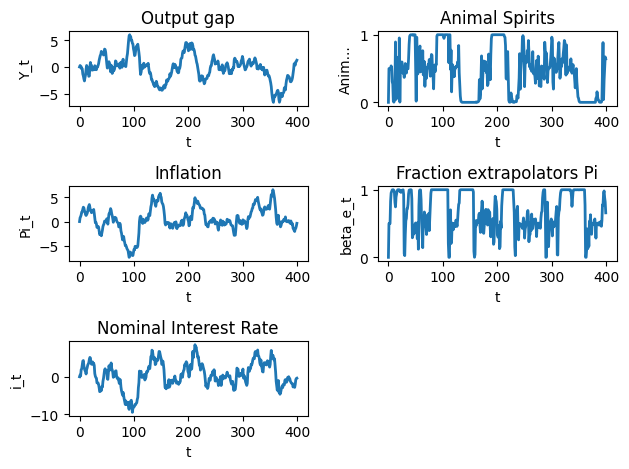

In [6]:
plt.figure()
plt.subplot(3, 2, 1)
plt.plot(Y,linewidth=2)
plt.title('Output gap')
plt.ylabel('Y_t')
plt.xlabel('t')

plt.subplot(3, 2, 2)
plt.plot(animalspirits,linewidth=2)
plt.title('Animal Spirits')
plt.ylabel('Anim...')
plt.xlabel('t')


plt.subplot(3, 2, 3)
plt.plot(Pi,linewidth=2)
plt.title('Inflation')
plt.ylabel('Pi_t')
plt.xlabel('t')



plt.subplot(3, 2, 4)
plt.plot(beta_ext,linewidth=2)
plt.title('Fraction extrapolators Pi')
plt.ylabel('beta_e_t')
plt.xlabel('t')


plt.subplot(3, 2, 5)
plt.plot(ni,linewidth=2)
plt.title('Nominal Interest Rate')
plt.ylabel('i_t')
plt.xlabel('t')
plt.tight_layout() #

